In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import re
import string


In [2]:
sip_df=pd.read_csv(r"Sip-task-info.csv",engine='python')

In [10]:
sip_df.describe()

,TaskNumber,Priority,RaisedByID,AssignedToID,AuthorisedByID,HoursEstimate,HoursActual,DeveloperID,DeveloperHoursActual,TaskPerformance,DeveloperPerformance
count,12299.000000,12299.000000,12299.000000,12299.000000,4265.000000,12299.000000,12299.000000,12299.000000,12299.000000,12299.000000,10200.000000
mean,8932.838686,2.176356,37.103017,37.296772,45.667526,10.152034,13.175468,36.627449,7.724366,-3.023434,0.467541
std,3271.407366,1.720049,19.859530,18.823674,18.773525,28.841783,68.724667,18.958718,36.015641,67.219867,38.666102
min,1735.000000,1.000000,1.000000,1.000000,6.000000,0.010000,0.010000,1.000000,0.010000,-2469.160000,-2079.500000
25%,6188.500000,1.000000,16.000000,22.000000,43.000000,1.000000,1.000000,13.000000,1.000000,-1.750000,0.000000
50%,9090.000000,1.000000,42.000000,42.000000,58.000000,3.000000,3.000000,42.000000,2.000000,0.000000,0.000000
75%,11766.500000,3.000000,58.000000,58.000000,58.000000,7.000000,8.500000,58.000000,5.250000,0.500000,1.000000
max,14377.000000,10.000000,67.000000,65.000000,58.000000,910.000000,2490.160000,65.000000,2100.500000,701.140000,709.840000


In [9]:
sip_df['HoursActual'].describe()

count    12299.000000
mean        13.175468
std         68.724667
min          0.010000
25%          1.000000
50%          3.000000
75%          8.500000
max       2490.160000
Name: HoursActual, dtype: float64

In [11]:
data=sip_df.HoursActual.values
sort_data=np.array(np.sort(data))
print(sort_data.shape)
idx=0
offset=sort_data.shape[0]//10
print(offset)
binned=[]
for i in range(10):
    binned.append(sort_data[idx:idx+offset])
    idx+=offset
binned=np.array(binned)

(12299,)
1229


In [24]:
import math
catgories=[]
for i,bin in enumerate(binned):
    
    if(i==9):
        print(str(bin[0])+"-"+str(float(math.floor(bin[-1]))))
        catgories.append(str(float(math.floor(bin[0])))+"-"+str(100.0))
    else:
        print(str(float(math.floor(bin[0])))+"-"+str(float(math.floor(bin[-1]))))
        
        catgories.append(str(float(math.floor(bin[0])))+"-"+str(float(math.floor(bin[-1]))))
    

0.0-0.0
0.0-1.0
1.0-1.0
1.0-2.0
2.0-3.0
3.0-4.0
4.0-7.0
7.0-10.0
10.0-23.0
23.89-698.0


In [25]:
for cat in catgories:
    s=cat.split('-')
    if(s[0]==s[1]):
        catgories.remove(cat)
print(catgories)

['0.0-1.0', '1.0-2.0', '2.0-3.0', '3.0-4.0', '4.0-7.0', '7.0-10.0', '10.0-23.0', '23.0-100.0']


In [13]:
catgories.remove('0.0-0.0')
catgories.remove('1.0-1.0')
catgories

['0.0-1.0',
 '1.0-2.0',
 '2.0-3.0',
 '3.0-4.0',
 '4.0-7.0',
 '7.0-10.0',
 '10.0-23.0',
 '23.0-100.0']

In [28]:
labels=[]
encoded_labels=[]
for dat in data:
    for label in catgories:
        if (dat>=float(label.split("-")[0]) and dat<=float(label.split("-")[-1])):
            labels.append(label)
            encoded_labels.append("Task"+str(catgories.index(label)+1))
            break
        if(dat>=100):
            labels.append(">100")
            encoded_labels.append("Task9")
            break
            

In [29]:
print(np.array(encoded_labels).shape)
np.unique(encoded_labels)

(12299,)


array(['Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7',
       'Task8', 'Task9'], dtype='<U5')

In [40]:
def manual_binning(data):
    import math
    sort_data=np.array(np.sort(data))
    #print(sort_data.shape)
    idx=0
    offset=sort_data.shape[0]//10
    #print(offset)
    binned=[]
    for i in range(10):
        binned.append(sort_data[idx:idx+offset])
        idx+=offset
    binned=np.array(binned)
    
    catgories=[]
    for i,bin in enumerate(binned):

        if(i==9):
            #print(str(bin[0])+"-"+str(float(math.floor(bin[-1]))))
            catgories.append(str(float(math.floor(bin[0])))+"-"+str(100.0))
        else:
            #print(str(float(math.floor(bin[0])))+"-"+str(float(math.floor(bin[-1]))))
            catgories.append(str(float(math.floor(bin[0])))+"-"+str(float(math.floor(bin[-1]))))
    for cat in catgories:
        s=cat.split('-')
        if(s[0]==s[1]):
            catgories.remove(cat)
    print(catgories)
    labels=[]
    encoded_labels=[]
    for dat in data:
        for label in catgories:
            if (dat>=float(label.split("-")[0]) and dat<=float(label.split("-")[-1])):
                labels.append(label)
                encoded_labels.append("Task"+str(catgories.index(label)+1))
                break
            if(dat>=100):
                labels.append(">100")
                encoded_labels.append("Task9")
                break
    print(np.unique(labels).shape)
    return np.array(labels),np.array(encoded_labels)

In [41]:
lbls,enc_lbls=manual_binning(sip_df.HoursActual.values)

['0.0-1.0', '1.0-2.0', '2.0-3.0', '3.0-4.0', '4.0-7.0', '7.0-10.0', '10.0-23.0', '23.0-100.0']
(9,)


In [43]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),np.sort(x))
data=sip_df.HoursActual.values
nn, nbin = np.histogram(data, histedges_equalN(data, 9))
nbin = list(nbin)
nbin

[0.01, 0.5, 1.0, 1.65, 2.5, 3.75, 6.0, 10.0, 21.25, 2490.16]

In [46]:
def CleanText(Text):
        Text = re.sub(r'html',' ',Text)
        Text = re.sub(r'<div>',' ',Text)
        Text = re.sub(r'<p>',' ',Text)
        Text = re.sub(r'<pre>',' ',Text)
        Text = re.sub(r'<code>',' ',Text)
        Text = re.sub(r'html',' ',Text)
        Text = re.sub(r'< div>',' ',Text)
        Text = re.sub(r'< p>',' ',Text)
        Text = re.sub(r'< pre>',' ',Text)
        Text = re.sub(r'< code>',' ',Text)
        Text = re.sub(r'< code>',' ',Text)
        Text = re.sub(r'XXXX','',Text)
        Text = re.sub(r'CCC','',Text)
        Text = re.sub(r'YYY','',Text)
        Text = re.sub(r'ZZZ','',Text)
        ## Use string method to do further cleanup from punctuation and digits which will may not give any additional insight
        trans_punct = str.maketrans('', '', string.punctuation)
        trans_digit = str.maketrans('', '', string.digits)
        Text = Text.translate(trans_punct)
        Text = Text.translate(trans_digit)
        Text = Text.lower()
        return Text


In [47]:
new_sip_df=pd.DataFrame()
new_sip_df["Features"]=sip_df.Summary.apply(CleanText)
new_sip_df["Labels"]=lbls
new_sip_df["Encoded Labels"]=enc_lbls

In [48]:
new_sip_df

,Features,Labels,Encoded Labels
0,flag ri on scm message summary screen using me...,1.0-2.0,Task2
1,allow ri policies to be marked as exhausted,4.0-7.0,Task5
2,fix invalid uwref line dxlan,0.0-1.0,Task1
3,new rows in the diary event for the scm are re...,0.0-1.0,Task1
4,application screen size need to set min size ...,3.0-4.0,Task4
5,remove lloyds specific items from node type en...,4.0-7.0,Task5
6,ri metafield accessestabhiding seem to disappe...,4.0-7.0,Task5
7,settlement currency on risksectionlimit table ...,4.0-7.0,Task5
8,write selftests for period close,1.0-2.0,Task2
9,seach control obj sort order,1.0-2.0,Task2


In [49]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=50, 
        scale=3,
        random_state=1 
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()



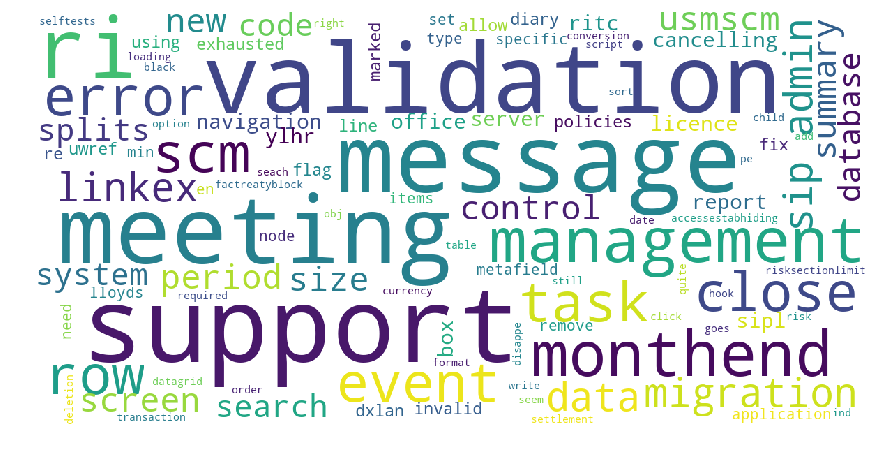

In [50]:
show_wordcloud(new_sip_df.Features)

In [51]:
new_sip_df.to_csv("modified_sip_dataset.csv",index=False)